# Анализ данных из Росстат

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# загрузка данных по URL ссылке
raw_stat_data = pd.read_excel('https://rosstat.gov.ru/storage/mediabank/cen-god.xls', skiprows=2, decimal=',').dropna() # decimal замена запятых на точки, dropna удаляет все строки содержащие Nan
raw_stat_data.head()

,ПОКАЗАТЕЛИ,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
1,Говядина (кроме бескостного мяса),15.54,221.5,2201.27,5186.28,12547.0,14137.0,15787.0,30.04,42.01,...,197.64,234.49,248.47,244.55,272.28,314.94,315.02,320.34,330.58,350.05
2,Свинина (кроме бескостного мяса),14.38,260,2672.81,6579.38,15053.0,16810.0,19055.0,33.99,43.37,...,198.35,210.89,220.09,214.18,272.36,271.08,264.32,255.87,275.26,264.55
3,Куры охлажденные и мороженые1),13.57,194.76,2238.98,5677.09,11587.0,13815.0,16061.0,30.74,39.28,...,105.14,103.57,117.26,107.03,136.14,133.73,138.49,126.29,151.27,143.13
4,Колбаса вареная2),17,271,3351.3,8984.10,20016.0,22859.0,26767.0,43.81,61.56,...,235.96,270.28,288.23,302.94,310.54,344.81,351.27,360.88,382.98,399.37
5,"Консервы мясные3), 350 г",8.87,163.9,1165.48,2991.46,6692.0,7375.0,7811.0,15.50,18.16,...,63.79,70.35,75.22,79.33,94.42,117.04,121.37,125.21,130.13,139.47


In [3]:
raw_stat_data.shape

(78, 30)

In [4]:
raw_stat_data.columns

Index([' ПОКАЗАТЕЛИ ',           1991,           1992,           1993,
                 1994,           1995,           1996,           1997,
                 1998,           1999,           2000,           2001,
                 2002,           2003,           2004,           2005,
                 2006,           2007,           2008,           2009,
                 2010,           2011,           2012,           2013,
                 2014,           2015,           2016,           2017,
                 2018,           2019],
      dtype='object')

In [5]:
# приводим значения ключей столбцов в единый строковой тип
raw_stat_data.columns = raw_stat_data.columns.astype('str')
raw_stat_data.columns

Index([' ПОКАЗАТЕЛИ ', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019'],
      dtype='object')

In [6]:
# для удобства работы транспонируем таблицу
raw_stat_data = raw_stat_data.T
raw_stat_data.head()

,1,2,3,4,5,6,7,8,9,10,...,76,78,79,80,81,82,83,84,85,86
ПОКАЗАТЕЛИ,Говядина (кроме бескостного мяса),Свинина (кроме бескостного мяса),Куры охлажденные и мороженые1),Колбаса вареная2),"Консервы мясные3), 350 г",Рыба мороженая неразделанная4),"Рыба соленая, маринованная, копченая",Консервы рыбные натуральные и с добавлением ма...,Масло сливочное 5),Масло подсолнечное 6),...,"Отопление28), за м2 общей площади","Газ сетевой, за месяц с человека",Электроэнергия в квартирах без электроплит за...,"Кинотеатры, за билет","Театры, за билет","Посещение детского ясли-сада, за день30)","Санаторий31), за день","Дом отдыха, пансионат32), за день",Первичный консультативный прием у врача-специа...,Общий анализ крови33)
1991,15.54,14.38,13.57,17,8.87,2.32,5.72,3.91,12.24,5.48,...,0.21,0.51,3.92,1.89,2.87,0.59,30.17,19.64,10.5,4.54
1992,221.5,260,194.76,271,163.9,129.5,272.6,120,413,190,...,1.2,3.4,35.1,23.82,18.92,17.34,618.53,360.03,122.61,48.02
1993,2201.27,2672.81,2238.98,3351.3,1165.48,1088.73,2598.96,1040.71,2912.58,1364.9,...,8,29,595,498,498,249,10304,6664,1614,777
1994,5186.28,6579.38,5677.09,8984.1,2991.46,3675.17,7495.95,3211.18,12985,5306.54,...,124.79,64.66,2682.71,1972.56,3186.69,955.52,35615.4,25380.8,7016.21,3470.18


In [7]:
# в качестве ключей столбцов устанавливаем значения категории "Показатели"
raw_stat_data.columns = raw_stat_data.loc[' ПОКАЗАТЕЛИ ', :]
raw_stat_data.head()

ПОКАЗАТЕЛИ,Говядина (кроме бескостного мяса),Свинина (кроме бескостного мяса),Куры охлажденные и мороженые1),Колбаса вареная2),"Консервы мясные3), 350 г",Рыба мороженая неразделанная4),"Рыба соленая, маринованная, копченая","Консервы рыбные натуральные и с добавлением масла, 350 г",Масло сливочное 5),Масло подсолнечное 6),...,"Отопление28), за м2 общей площади","Газ сетевой, за месяц с человека","Электроэнергия в квартирах без электроплит за минимальный объем потребления29), за 100 кВт·ч","Кинотеатры, за билет","Театры, за билет","Посещение детского ясли-сада, за день30)","Санаторий31), за день","Дом отдыха, пансионат32), за день",Первичный консультативный прием у врача-специалиста,Общий анализ крови33)
ПОКАЗАТЕЛИ,Говядина (кроме бескостного мяса),Свинина (кроме бескостного мяса),Куры охлажденные и мороженые1),Колбаса вареная2),"Консервы мясные3), 350 г",Рыба мороженая неразделанная4),"Рыба соленая, маринованная, копченая",Консервы рыбные натуральные и с добавлением ма...,Масло сливочное 5),Масло подсолнечное 6),...,"Отопление28), за м2 общей площади","Газ сетевой, за месяц с человека",Электроэнергия в квартирах без электроплит за...,"Кинотеатры, за билет","Театры, за билет","Посещение детского ясли-сада, за день30)","Санаторий31), за день","Дом отдыха, пансионат32), за день",Первичный консультативный прием у врача-специа...,Общий анализ крови33)
1991,15.54,14.38,13.57,17,8.87,2.32,5.72,3.91,12.24,5.48,...,0.21,0.51,3.92,1.89,2.87,0.59,30.17,19.64,10.5,4.54
1992,221.5,260,194.76,271,163.9,129.5,272.6,120,413,190,...,1.2,3.4,35.1,23.82,18.92,17.34,618.53,360.03,122.61,48.02
1993,2201.27,2672.81,2238.98,3351.3,1165.48,1088.73,2598.96,1040.71,2912.58,1364.9,...,8,29,595,498,498,249,10304,6664,1614,777
1994,5186.28,6579.38,5677.09,8984.1,2991.46,3675.17,7495.95,3211.18,12985,5306.54,...,124.79,64.66,2682.71,1972.56,3186.69,955.52,35615.4,25380.8,7016.21,3470.18


In [8]:
raw_stat_data.head(10)

ПОКАЗАТЕЛИ,Говядина (кроме бескостного мяса),Свинина (кроме бескостного мяса),Куры охлажденные и мороженые1),Колбаса вареная2),"Консервы мясные3), 350 г",Рыба мороженая неразделанная4),"Рыба соленая, маринованная, копченая","Консервы рыбные натуральные и с добавлением масла, 350 г",Масло сливочное 5),Масло подсолнечное 6),...,"Отопление28), за м2 общей площади","Газ сетевой, за месяц с человека","Электроэнергия в квартирах без электроплит за минимальный объем потребления29), за 100 кВт·ч","Кинотеатры, за билет","Театры, за билет","Посещение детского ясли-сада, за день30)","Санаторий31), за день","Дом отдыха, пансионат32), за день",Первичный консультативный прием у врача-специалиста,Общий анализ крови33)
ПОКАЗАТЕЛИ,Говядина (кроме бескостного мяса),Свинина (кроме бескостного мяса),Куры охлажденные и мороженые1),Колбаса вареная2),"Консервы мясные3), 350 г",Рыба мороженая неразделанная4),"Рыба соленая, маринованная, копченая",Консервы рыбные натуральные и с добавлением ма...,Масло сливочное 5),Масло подсолнечное 6),...,"Отопление28), за м2 общей площади","Газ сетевой, за месяц с человека",Электроэнергия в квартирах без электроплит за...,"Кинотеатры, за билет","Театры, за билет","Посещение детского ясли-сада, за день30)","Санаторий31), за день","Дом отдыха, пансионат32), за день",Первичный консультативный прием у врача-специа...,Общий анализ крови33)
1991,15.54,14.38,13.57,17,8.87,2.32,5.72,3.91,12.24,5.48,...,0.21,0.51,3.92,1.89,2.87,0.59,30.17,19.64,10.5,4.54
1992,221.5,260,194.76,271,163.9,129.5,272.6,120,413,190,...,1.2,3.4,35.1,23.82,18.92,17.34,618.53,360.03,122.61,48.02
1993,2201.27,2672.81,2238.98,3351.3,1165.48,1088.73,2598.96,1040.71,2912.58,1364.9,...,8,29,595,498,498,249,10304,6664,1614,777
1994,5186.28,6579.38,5677.09,8984.1,2991.46,3675.17,7495.95,3211.18,12985,5306.54,...,124.79,64.66,2682.71,1972.56,3186.69,955.52,35615.4,25380.8,7016.21,3470.18
1995,12547,15053,11587,20016,6692,8325,17488,8050,20075,10460,...,471,951,8077,3886,6185,2638,90428,60847,20704,10471
1996,14137,16810,13815,22859,7375,9398,19912,8540,22968,8412,...,703,1184,12083,4617,9106,3805,134568,83494,29400,13922
1997,15787,19055,16061,26767,7811,9912,21402,8468,23238,9589,...,861,2449,15661,4948,12996,4581,168016,118718,35055,19491
1998,30.04,33.99,30.74,43.81,15.5,18.93,32.13,13.85,64.44,23.43,...,0.92,3.18,17.09,7.36,17.32,5.12,201.84,135.41,41.9,24.4
1999,42.01,43.37,39.28,61.56,18.16,23.83,47.89,19.96,66.83,25.74,...,1.13,4.31,25.4,13.09,25.12,7.9,264.25,197.9,52.67,31.22


In [9]:
raw_stat_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries,  ПОКАЗАТЕЛИ  to 2019
Data columns (total 78 columns):
 #   Column                                                                                            Non-Null Count  Dtype 
---  ------                                                                                            --------------  ----- 
 0   Говядина (кроме бескостного мяса)                                                                 30 non-null     object
 1   Свинина (кроме бескостного мяса)                                                                  30 non-null     object
 2   Куры охлажденные и мороженые1)                                                                    30 non-null     object
 3   Колбаса вареная2)                                                                                 30 non-null     object
 4   Консервы мясные3), 350 г                                                                          30 non-null     object
 5   Ры

In [10]:
raw_stat_data

ПОКАЗАТЕЛИ,Говядина (кроме бескостного мяса),Свинина (кроме бескостного мяса),Куры охлажденные и мороженые1),Колбаса вареная2),"Консервы мясные3), 350 г",Рыба мороженая неразделанная4),"Рыба соленая, маринованная, копченая","Консервы рыбные натуральные и с добавлением масла, 350 г",Масло сливочное 5),Масло подсолнечное 6),...,"Отопление28), за м2 общей площади","Газ сетевой, за месяц с человека","Электроэнергия в квартирах без электроплит за минимальный объем потребления29), за 100 кВт·ч","Кинотеатры, за билет","Театры, за билет","Посещение детского ясли-сада, за день30)","Санаторий31), за день","Дом отдыха, пансионат32), за день",Первичный консультативный прием у врача-специалиста,Общий анализ крови33)
ПОКАЗАТЕЛИ,Говядина (кроме бескостного мяса),Свинина (кроме бескостного мяса),Куры охлажденные и мороженые1),Колбаса вареная2),"Консервы мясные3), 350 г",Рыба мороженая неразделанная4),"Рыба соленая, маринованная, копченая",Консервы рыбные натуральные и с добавлением ма...,Масло сливочное 5),Масло подсолнечное 6),...,"Отопление28), за м2 общей площади","Газ сетевой, за месяц с человека",Электроэнергия в квартирах без электроплит за...,"Кинотеатры, за билет","Театры, за билет","Посещение детского ясли-сада, за день30)","Санаторий31), за день","Дом отдыха, пансионат32), за день",Первичный консультативный прием у врача-специа...,Общий анализ крови33)
1991,15.54,14.38,13.57,17,8.87,2.32,5.72,3.91,12.24,5.48,...,0.21,0.51,3.92,1.89,2.87,0.59,30.17,19.64,10.5,4.54
1992,221.5,260,194.76,271,163.9,129.5,272.6,120,413,190,...,1.2,3.4,35.1,23.82,18.92,17.34,618.53,360.03,122.61,48.02
1993,2201.27,2672.81,2238.98,3351.3,1165.48,1088.73,2598.96,1040.71,2912.58,1364.9,...,8,29,595,498,498,249,10304,6664,1614,777
1994,5186.28,6579.38,5677.09,8984.1,2991.46,3675.17,7495.95,3211.18,12985,5306.54,...,124.79,64.66,2682.71,1972.56,3186.69,955.52,35615.4,25380.8,7016.21,3470.18
1995,12547,15053,11587,20016,6692,8325,17488,8050,20075,10460,...,471,951,8077,3886,6185,2638,90428,60847,20704,10471
1996,14137,16810,13815,22859,7375,9398,19912,8540,22968,8412,...,703,1184,12083,4617,9106,3805,134568,83494,29400,13922
1997,15787,19055,16061,26767,7811,9912,21402,8468,23238,9589,...,861,2449,15661,4948,12996,4581,168016,118718,35055,19491
1998,30.04,33.99,30.74,43.81,15.5,18.93,32.13,13.85,64.44,23.43,...,0.92,3.18,17.09,7.36,17.32,5.12,201.84,135.41,41.9,24.4
1999,42.01,43.37,39.28,61.56,18.16,23.83,47.89,19.96,66.83,25.74,...,1.13,4.31,25.4,13.09,25.12,7.9,264.25,197.9,52.67,31.22


In [11]:
# срезаем из таблицы данные до 1998, т.к. до этого года была слишком большая инфляция
stat_data = raw_stat_data.loc['1998':, :]
stat_data

ПОКАЗАТЕЛИ,Говядина (кроме бескостного мяса),Свинина (кроме бескостного мяса),Куры охлажденные и мороженые1),Колбаса вареная2),"Консервы мясные3), 350 г",Рыба мороженая неразделанная4),"Рыба соленая, маринованная, копченая","Консервы рыбные натуральные и с добавлением масла, 350 г",Масло сливочное 5),Масло подсолнечное 6),...,"Отопление28), за м2 общей площади","Газ сетевой, за месяц с человека","Электроэнергия в квартирах без электроплит за минимальный объем потребления29), за 100 кВт·ч","Кинотеатры, за билет","Театры, за билет","Посещение детского ясли-сада, за день30)","Санаторий31), за день","Дом отдыха, пансионат32), за день",Первичный консультативный прием у врача-специалиста,Общий анализ крови33)
1998,30.04,33.99,30.74,43.81,15.5,18.93,32.13,13.85,64.44,23.43,...,0.92,3.18,17.09,7.36,17.32,5.12,201.84,135.41,41.9,24.4
1999,42.01,43.37,39.28,61.56,18.16,23.83,47.89,19.96,66.83,25.74,...,1.13,4.31,25.4,13.09,25.12,7.9,264.25,197.9,52.67,31.22
2000,52.72,58.45,48.8,77.97,19.52,29.54,61.22,21.15,69.12,23.2,...,1.61,5.66,39.16,23.11,33.6,9.19,351.35,279.76,62.97,37.99
2001,70.33,79.22,56.92,96.01,24.07,36.57,75.98,25.08,71.73,33.07,...,2.87,6.89,52.31,34.39,45.08,11.57,444.06,352.04,76.6,46.89
2002,72.56,80.98,58.38,101.57,26.55,40.39,87.99,25.11,80.08,35.76,...,4.55,9.47,70.85,48.66,61.77,15.5,551.39,426.89,99.77,59.21
2003,73.9,82.42,69.32,106.66,28.18,42.99,93.15,25.67,87.96,38.16,...,6.13,12.34,81.07,58.52,72.06,16.39,631.81,488.84,116.43,66.94
2004,93.41,110.47,69.94,129.94,32.04,48.68,107.99,27.61,93.96,39.1,...,7.32,14.36,93.15,74.73,89.7,19.95,724.84,548.62,138.84,77.96
2005,115.77,131.64,81.35,142.85,37.01,55.76,130.65,30.79,102.42,40.06,...,9.77,18.08,110.62,88.63,111.43,26.53,822.07,608.58,171.36,94.6
2006,131.67,142,78.37,153.94,40.1,58.69,144.92,32.28,109.71,39.41,...,11.39,20.63,129.87,103.34,134.44,33.87,940.57,714.24,197.08,110.21
2007,139.49,149.02,88.2,166.96,43.13,62.82,154.98,35.2,155.1,60.26,...,13.03,24.3,145.15,114.32,162.11,37.24,1100.52,844.67,223.27,128.21


In [13]:
# символы "-" заменяем на 0
stat_data = stat_data.replace('-', 0.0)
stat_data

ПОКАЗАТЕЛИ,Говядина (кроме бескостного мяса),Свинина (кроме бескостного мяса),Куры охлажденные и мороженые1),Колбаса вареная2),"Консервы мясные3), 350 г",Рыба мороженая неразделанная4),"Рыба соленая, маринованная, копченая","Консервы рыбные натуральные и с добавлением масла, 350 г",Масло сливочное 5),Масло подсолнечное 6),...,"Отопление28), за м2 общей площади","Газ сетевой, за месяц с человека","Электроэнергия в квартирах без электроплит за минимальный объем потребления29), за 100 кВт·ч","Кинотеатры, за билет","Театры, за билет","Посещение детского ясли-сада, за день30)","Санаторий31), за день","Дом отдыха, пансионат32), за день",Первичный консультативный прием у врача-специалиста,Общий анализ крови33)
1998,30.04,33.99,30.74,43.81,15.5,18.93,32.13,13.85,64.44,23.43,...,0.92,3.18,17.09,7.36,17.32,5.12,201.84,135.41,41.9,24.4
1999,42.01,43.37,39.28,61.56,18.16,23.83,47.89,19.96,66.83,25.74,...,1.13,4.31,25.4,13.09,25.12,7.9,264.25,197.9,52.67,31.22
2000,52.72,58.45,48.8,77.97,19.52,29.54,61.22,21.15,69.12,23.2,...,1.61,5.66,39.16,23.11,33.6,9.19,351.35,279.76,62.97,37.99
2001,70.33,79.22,56.92,96.01,24.07,36.57,75.98,25.08,71.73,33.07,...,2.87,6.89,52.31,34.39,45.08,11.57,444.06,352.04,76.6,46.89
2002,72.56,80.98,58.38,101.57,26.55,40.39,87.99,25.11,80.08,35.76,...,4.55,9.47,70.85,48.66,61.77,15.5,551.39,426.89,99.77,59.21
2003,73.9,82.42,69.32,106.66,28.18,42.99,93.15,25.67,87.96,38.16,...,6.13,12.34,81.07,58.52,72.06,16.39,631.81,488.84,116.43,66.94
2004,93.41,110.47,69.94,129.94,32.04,48.68,107.99,27.61,93.96,39.1,...,7.32,14.36,93.15,74.73,89.7,19.95,724.84,548.62,138.84,77.96
2005,115.77,131.64,81.35,142.85,37.01,55.76,130.65,30.79,102.42,40.06,...,9.77,18.08,110.62,88.63,111.43,26.53,822.07,608.58,171.36,94.6
2006,131.67,142,78.37,153.94,40.1,58.69,144.92,32.28,109.71,39.41,...,11.39,20.63,129.87,103.34,134.44,33.87,940.57,714.24,197.08,110.21
2007,139.49,149.02,88.2,166.96,43.13,62.82,154.98,35.2,155.1,60.26,...,13.03,24.3,145.15,114.32,162.11,37.24,1100.52,844.67,223.27,128.21


In [15]:
stat_data.values[:100]

array([[30.04, 33.99, 30.74, ..., 135.41, 41.9, 24.4],
       [42.01, 43.37, 39.28, ..., 197.9, 52.67, 31.22],
       [52.72, 58.45, 48.8, ..., 279.76, 62.97, 37.99],
       ...,
       [320.34, 255.87, 126.29, ..., 1869.65, 683.9, 370.24],
       [330.58, 275.26, 151.27, ..., 1869.54, 724.61, 382.06],
       ['350.05', '264.55', '143.13', ..., '1937.53', '780.86', '398.49']],
      dtype=object)

In [17]:
# т.к. тип некоторых данных является строковым, то нужно сконвертировать их в тип вещественных чисел
stat_data = stat_data.astype(np.float32)
stat_data.values[:100]

array([[  30.04,   33.99,   30.74, ...,  135.41,   41.9 ,   24.4 ],
       [  42.01,   43.37,   39.28, ...,  197.9 ,   52.67,   31.22],
       [  52.72,   58.45,   48.8 , ...,  279.76,   62.97,   37.99],
       ...,
       [ 320.34,  255.87,  126.29, ..., 1869.65,  683.9 ,  370.24],
       [ 330.58,  275.26,  151.27, ..., 1869.54,  724.61,  382.06],
       [ 350.05,  264.55,  143.13, ..., 1937.53,  780.86,  398.49]],
      dtype=float32)

In [23]:
# "очищенный" datafra,e можно сохранить в виде эксель файла
stat_data.to_excel('prices_stat_data.xlsx')

In [21]:
# смортим на ключи столбцов
stat_data.columns

Index(['Говядина (кроме бескостного мяса)', 'Свинина (кроме бескостного мяса)',
       'Куры охлажденные и мороженые1)', 'Колбаса вареная2)',
       'Консервы мясные3), 350 г', 'Рыба мороженая неразделанная4)',
       'Рыба соленая, маринованная, копченая ',
       'Консервы рыбные натуральные и с добавлением масла,  350 г',
       'Масло сливочное 5) ', 'Масло подсолнечное 6) ',
       'Молоко питьевое цельное  пастеризованное 2,5-3,2% жирности7), за л',
       'Сыры сычужные твердые и мягкие', 'Яйца куриные, за 10 шт.',
       'Сахар-песок', 'Чай черный байховый', 'Мука пшеничная',
       'Хлеб и булочные изделия из пшеничной муки высшего сорта',
       'Рис шлифованный',
       'Макаронные изделия из пшеничной муки высшего сорта8)', 'Картофель',
       'Капуста белокочанная свежая', 'Лук репчатый', 'Яблоки',
       'Водка крепостью 40% об.спирта и выше9), за л',
       'Коньяк ординарный отечественный10), за  л',
       'Вино игристое отечественное11), за  л', 'Пиво отечественное, з

In [22]:
# удаление лишних символов пробела (" ") из ключей столбцов
stat_data.columns = stat_data.columns.str.strip(' ')
stat_data.columns

Index(['Говядина (кроме бескостного мяса)', 'Свинина (кроме бескостного мяса)',
       'Куры охлажденные и мороженые1)', 'Колбаса вареная2)',
       'Консервы мясные3), 350 г', 'Рыба мороженая неразделанная4)',
       'Рыба соленая, маринованная, копченая',
       'Консервы рыбные натуральные и с добавлением масла,  350 г',
       'Масло сливочное 5)', 'Масло подсолнечное 6)',
       'Молоко питьевое цельное  пастеризованное 2,5-3,2% жирности7), за л',
       'Сыры сычужные твердые и мягкие', 'Яйца куриные, за 10 шт.',
       'Сахар-песок', 'Чай черный байховый', 'Мука пшеничная',
       'Хлеб и булочные изделия из пшеничной муки высшего сорта',
       'Рис шлифованный',
       'Макаронные изделия из пшеничной муки высшего сорта8)', 'Картофель',
       'Капуста белокочанная свежая', 'Лук репчатый', 'Яблоки',
       'Водка крепостью 40% об.спирта и выше9), за л',
       'Коньяк ординарный отечественный10), за  л',
       'Вино игристое отечественное11), за  л', 'Пиво отечественное, за л

In [24]:
stat_data['Общий анализ крови33)']

1998     24.400000
1999     31.219999
2000     37.990002
2001     46.889999
2002     59.209999
2003     66.940002
2004     77.959999
2005     94.599998
2006    110.209999
2007    128.210007
2008    148.320007
2009    174.110001
2010    195.110001
2011    217.699997
2012    242.250000
2013    277.239990
2014    306.950012
2015    334.209991
2016    354.910004
2017    370.239990
2018    382.059998
2019    398.489990
Name: Общий анализ крови33), dtype: float32

In [28]:
# сколько раз изменилась средняя цена на определенную категорию
stat_data.loc['2019','Говядина (кроме бескостного мяса)'] / stat_data.loc['1998','Говядина (кроме бескостного мяса)']

11.652796

## визуализация динамики средних цен по категориям


In [34]:
# извлечение данных
prices_1 = stat_data['Говядина (кроме бескостного мяса)']
prices_2 = stat_data['Хлеб и булочные изделия из пшеничной муки высшего сорта']
prices_3 = stat_data['Коньяк ординарный отечественный10), за  л']

In [32]:
# извлекаем года для временной шкалы, попутно конвертируя в целочисленный тип
years = stat_data.index.astype(int)
years

Int64Index([1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
            2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019],
           dtype='int64')

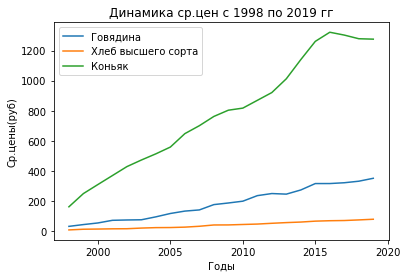

In [35]:
# строим график

plt.plot(years, prices_1, label='Говядина')
plt.plot(years, prices_2, label='Хлеб высшего сорта')
plt.plot(years, prices_3, label='Коньяк')

plt.legend()

plt.title('Динамика ср.цен с 1998 по 2019 гг')
plt.xlabel('Годы')
plt.ylabel('Ср.цены(руб)')

plt.show()